In [15]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [16]:
# Import data
all_data_csv = Path("Resources/all_data.csv")

#Reading data
all_data = pd.read_csv(all_data_csv,encoding='utf-8')

In [19]:
# Updating the population data from dtype object to dtype numerical
all_data["Population (2023)"] = pd.to_numeric(all_data["Population (2023)"].str.replace(',',''), errors='coerce')

In [45]:
all_data = all_data.sort_values(by=["Population (2023)"])

In [46]:
# Creating bins and names to hold the data
bins = [0, 1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 50_000_000, 100_000_000, 1_000_000_000, 1_500_000_000]

group_names = ["Below 1 Million","1M-5M","5-10M","10-15M", "15-20M", "20-50M", "50-100M", "100M-1B","Above 1 Billion"]

In [48]:
# Slice data and place into bins
all_data["Population Range"] = pd.cut(all_data["Population (2023)"],
                                       bins, labels = group_names,
                                       include_lowest= True, ordered= True)

all_data.head()


,Unnamed: 0,Flag,Country,Score,Torrents Restricted?,Torrents Banned or Shut Down?,Pornography Restricted?,Pornography Banned?,Political Media Restricted?,Political Media Heavily Censored?,Social Media Restricted?,Social Media Banned?,VPNs Restricted,VPNs Banned?,Messaging and VoIP App Restrictions,Population (2023),4.1.4) Level of web accessibility,4.2.1) Privacy regulations,Population Range
90,90,:li:,Liechtenstein,1,Y,N,N,N,N,N,N,N,N,N,N,39584,NaN,NaN,Below 1 Million
3,3,:ad:,Andorra,1,Y,N,N,N,N,N,N,N,N,N,N,80088,NaN,NaN,Below 1 Million
136,136,:sc:,Seychelles,1,Y,N,N,N,N,N,N,N,N,N,N,107660,NaN,NaN,Below 1 Million
158,158,:to:,Tonga,2,Y,N,N,N,Y,N,N,N,N,N,N,107773,NaN,NaN,Below 1 Million
132,132,:ws:,Samoa,2,Y,N,N,N,Y,N,N,N,N,N,N,225681,NaN,NaN,Below 1 Million


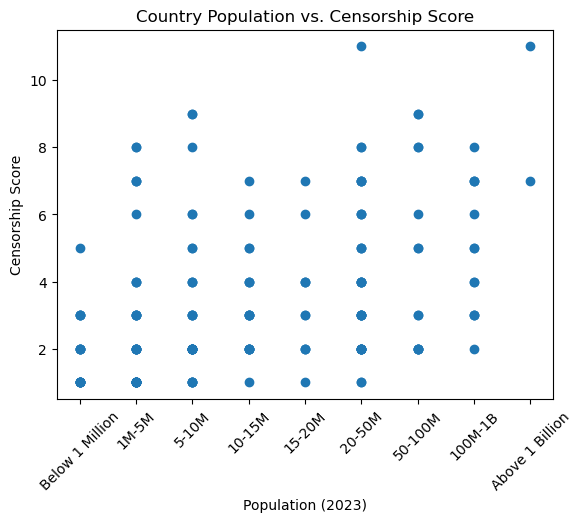

In [51]:
# Correlation of population vs censorship

x_values = all_data["Population Range"]
y_values = all_data["Score"]

plt.scatter(x_values,y_values)
plt.xlabel("Population (2023)")
plt.xticks(rotation=45)
plt.ylabel("Censorship Score")
plt.title("Country Population vs. Censorship Score")
plt.show()